In [1]:
#### Keras and Tensorflow > 2.0

import pandas_datareader as pdr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import numpy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

import tensorflow as tf
import math
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("bitcoin_data.csv")
df.head()

,Timestamp,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
0,1/1/17 0:00,966.34,1005.00,960.53,997.75,6850.59,6764742.06,987.47
1,1/2/17 0:00,997.75,1032.00,990.01,1012.54,8167.38,8273576.99,1013.00
2,1/3/17 0:00,1011.44,1039.00,999.99,1035.24,9089.66,9276500.31,1020.56
3,1/4/17 0:00,1035.51,1139.89,1028.56,1114.92,21562.46,23469644.96,1088.45
4,1/5/17 0:00,1114.38,1136.72,885.41,1004.74,36018.86,36211399.53,1005.35


In [3]:
df.tail()

,Timestamp,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
447,3/24/18 0:00,8917.99,9020.00,8505.00,8547.00,9731.98,8.581162e+07,8817.49
448,3/25/18 0:00,8541.96,8680.00,8368.63,8453.90,9155.91,7.801322e+07,8520.53
449,3/26/18 0:00,8451.12,8500.00,7831.15,8149.66,17693.42,1.452465e+08,8209.07
450,3/27/18 0:00,8152.26,8211.62,7742.11,7791.70,12385.25,9.848842e+07,7952.07
451,3/28/18 0:00,7791.69,8104.98,7723.03,8039.86,4732.51,3.749762e+07,7923.40


In [4]:
df1 = df.reset_index()["Open"]
df1

0       966.34
1       997.75
2      1011.44
3      1035.51
4      1114.38
        ...   
447    8917.99
448    8541.96
449    8451.12
450    8152.26
451    7791.69
Name: Open, Length: 452, dtype: float64

In [5]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))
print(df1)

[[0.0101928 ]
 [0.01189902]
 [0.01264267]
 [0.01395018]
 [0.01823448]
 [0.01227818]
 [0.0062643 ]
 [0.00692593]
 [0.00712149]
 [0.00637674]
 [0.00687378]
 [0.        ]
 [0.00156499]
 [0.0025683 ]
 [0.00221738]
 [0.0023445 ]
 [0.00288227]
 [0.00691235]
 [0.00592045]
 [0.00671028]
 [0.00636153]
 [0.00778312]
 [0.00787926]
 [0.00730346]
 [0.00579986]
 [0.00622247]
 [0.00740124]
 [0.007568  ]
 [0.00759951]
 [0.00730183]
 [0.00767502]
 [0.01006514]
 [0.0111407 ]
 [0.01251828]
 [0.01283932]
 [0.01385295]
 [0.01256608]
 [0.01332495]
 [0.01487201]
 [0.01483127]
 [0.01124499]
 [0.01177625]
 [0.01261932]
 [0.0120609 ]
 [0.01206144]
 [0.01250361]
 [0.01264756]
 [0.01380895]
 [0.01504964]
 [0.01508495]
 [0.01483507]
 [0.01658421]
 [0.01880213]
 [0.01908406]
 [0.02199078]
 [0.02180174]
 [0.02028401]
 [0.02182401]
 [0.02259428]
 [0.02240525]
 [0.02440643]
 [0.02594481]
 [0.02763202]
 [0.02614471]
 [0.02668683]
 [0.0271491 ]
 [0.02472476]
 [0.02013354]
 [0.02239601]
 [0.01808075]
 [0.02161325]
 [0.02

In [6]:
# Split Dataset ---- train and test
training_size = int(len(df1)*0.65)
test_size = len(df1)-training_size
train_data,test_data = df1[0:training_size,:],df1[training_size:len(df1),:1]

In [7]:
training_size,test_size

(293, 159)

In [8]:
#convert values into a dataset matrix
def create_dataset(dataset,time_step=1):
    dataX,dataY = [],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return numpy.array(dataX),numpy.array(dataY)

In [9]:
time_step = 10
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [10]:
print(X_train.shape),print(y_train.shape)

(282, 10)
(282,)


(None, None)

In [11]:
print(X_test.shape),print(y_test.shape)

(148, 10)
(148,)


(None, None)

In [12]:
#Reshape input which is required for LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [13]:
#LSTM model

model = Sequential()
model.add(LSTM(50,return_sequences = True, input_shape=(10,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 10, 50)            20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=300,batch_size=64,verbose=1)

Epoch 1/300
5/5 [==============================] - 1s 213ms/step - loss: 0.0080 - val_loss: 0.1466
Epoch 2/300
5/5 [==============================] - 0s 12ms/step - loss: 0.0041 - val_loss: 0.1038
Epoch 3/300
5/5 [==============================] - 0s 10ms/step - loss: 0.0024 - val_loss: 0.0939
Epoch 4/300
5/5 [==============================] - 0s 10ms/step - loss: 0.0019 - val_loss: 0.0198
Epoch 5/300
5/5 [==============================] - 0s 10ms/step - loss: 6.7875e-04 - val_loss: 0.0176
Epoch 6/300
5/5 [==============================] - 0s 10ms/step - loss: 5.2669e-04 - val_loss: 0.0291
Epoch 7/300
5/5 [==============================] - 0s 10ms/step - loss: 4.9731e-04 - val_loss: 0.0170
Epoch 8/300
5/5 [==============================] - 0s 10ms/step - loss: 2.8189e-04 - val_loss: 0.0103
Epoch 9/300
5/5 [==============================] - 0s 10ms/step - loss: 3.2930e-04 - val_loss: 0.0093
Epoch 10/300
5/5 [==============================] - 0s 10ms/step - loss: 2.9022e-04 - val_loss: 0

5/5 [==============================] - 0s 10ms/step - loss: 2.0718e-04 - val_loss: 0.0069
Epoch 81/300
5/5 [==============================] - 0s 10ms/step - loss: 1.8322e-04 - val_loss: 0.0069
Epoch 82/300
5/5 [==============================] - 0s 10ms/step - loss: 2.0092e-04 - val_loss: 0.0068
Epoch 83/300
5/5 [==============================] - 0s 10ms/step - loss: 1.9952e-04 - val_loss: 0.0070
Epoch 84/300
5/5 [==============================] - 0s 10ms/step - loss: 1.8884e-04 - val_loss: 0.0067
Epoch 85/300
5/5 [==============================] - 0s 10ms/step - loss: 1.9866e-04 - val_loss: 0.0071
Epoch 86/300
5/5 [==============================] - 0s 10ms/step - loss: 1.9301e-04 - val_loss: 0.0066
Epoch 87/300
5/5 [==============================] - 0s 10ms/step - loss: 2.0073e-04 - val_loss: 0.0071
Epoch 88/300
5/5 [==============================] - 0s 10ms/step - loss: 2.1204e-04 - val_loss: 0.0066
Epoch 89/300
5/5 [==============================] - 0s 10ms/step - loss: 1.9869e-04 - 

5/5 [==============================] - 0s 10ms/step - loss: 1.2819e-04 - val_loss: 0.0120
Epoch 159/300
5/5 [==============================] - 0s 10ms/step - loss: 1.1726e-04 - val_loss: 0.0130
Epoch 160/300
5/5 [==============================] - 0s 10ms/step - loss: 1.1686e-04 - val_loss: 0.0134
Epoch 161/300
5/5 [==============================] - 0s 10ms/step - loss: 1.1317e-04 - val_loss: 0.0134
Epoch 162/300
5/5 [==============================] - 0s 10ms/step - loss: 1.1228e-04 - val_loss: 0.0121
Epoch 163/300
5/5 [==============================] - 0s 10ms/step - loss: 1.1189e-04 - val_loss: 0.0142
Epoch 164/300
5/5 [==============================] - 0s 10ms/step - loss: 1.1419e-04 - val_loss: 0.0178
Epoch 165/300
5/5 [==============================] - 0s 10ms/step - loss: 1.3337e-04 - val_loss: 0.0110
Epoch 166/300
5/5 [==============================] - 0s 10ms/step - loss: 1.1698e-04 - val_loss: 0.0193
Epoch 167/300
5/5 [==============================] - 0s 10ms/step - loss: 1.31

Epoch 237/300
5/5 [==============================] - 0s 10ms/step - loss: 9.2636e-05 - val_loss: 0.0133
Epoch 238/300
5/5 [==============================] - 0s 10ms/step - loss: 9.0443e-05 - val_loss: 0.0119
Epoch 239/300
5/5 [==============================] - 0s 10ms/step - loss: 9.5501e-05 - val_loss: 0.0129
Epoch 240/300
5/5 [==============================] - 0s 10ms/step - loss: 8.7762e-05 - val_loss: 0.0122
Epoch 241/300
5/5 [==============================] - 0s 10ms/step - loss: 8.9406e-05 - val_loss: 0.0151
Epoch 242/300
5/5 [==============================] - 0s 10ms/step - loss: 9.3195e-05 - val_loss: 0.0145
Epoch 243/300
5/5 [==============================] - 0s 10ms/step - loss: 8.8593e-05 - val_loss: 0.0117
Epoch 244/300
5/5 [==============================] - 0s 10ms/step - loss: 8.9516e-05 - val_loss: 0.0190
Epoch 245/300
5/5 [==============================] - 0s 10ms/step - loss: 1.0773e-04 - val_loss: 0.0086
Epoch 246/300
5/5 [==============================] - 0s 10ms/ste

In [16]:
#Prediction
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [17]:
#Transform to original Form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [18]:
#Calculate RMSE performance
rmse = math.sqrt(mean_squared_error(y_train,train_predict))
print(rmse)

2794.3663819352014


In [19]:
#Test Data RMSE 
test_rmse = math.sqrt(mean_squared_error(y_test,test_predict))
print(test_rmse)

10549.931699048017


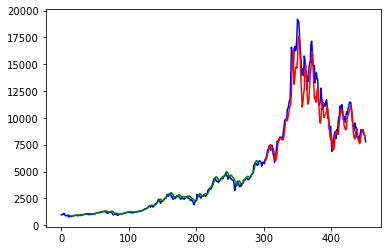

In [20]:
### Plotting Our model Result
# prepare Train Prediction for plotting
look_back=10
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# prepare Test Prediction for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot Real Data and Predictions
plt.plot(scaler.inverse_transform(df1),color="b",label="Real")
plt.plot(trainPredictPlot,color="g",label="TrainPredict")
plt.plot(testPredictPlot,color="r",label="TestPredict")
plt.show()

In [21]:
#Prediction for next 30 Days

In [22]:
len(test_data)

159

In [23]:
#recreate x input data for next days
x_input = test_data[110:].reshape(1,-1)
x_input.shape

(1, 49)

In [24]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()
temp_input

[0.36988866363772666,
 0.4063603395715593,
 0.4299660819552091,
 0.42268815171643564,
 0.3964646793864767,
 0.44067927348895225,
 0.4196771375864519,
 0.47325993477131933,
 0.5015242478168382,
 0.5119451922638176,
 0.5607178631414498,
 0.5244683601787814,
 0.5638750008148153,
 0.5679110525892658,
 0.5251805087489435,
 0.4923999461135483,
 0.5082546221755787,
 0.4839763855662532,
 0.4789641850651961,
 0.5188358136310994,
 0.532008660943404,
 0.5180209983334312,
 0.5507428942673942,
 0.5570137127982496,
 0.5794042939679768,
 0.5812881469361859,
 0.5779044906100685,
 0.5401850608504065,
 0.49572384931783675,
 0.462508718523685,
 0.4590196794190693,
 0.43545576422069987,
 0.47565331890567053,
 0.4528493547749263,
 0.4548499979358013,
 0.40291475728281917,
 0.4066661669132841,
 0.40631253707409615,
 0.38470852427171814,
 0.4034340662325331,
 0.42468662203651686,
 0.44137566896335945,
 0.4407325080883999,
 0.43075590958374893,
 0.44213453361058785,
 0.4217082005184398,
 0.4167736790757605,
 

In [25]:
#Demonstrate Prediction

lst_output=[]
n_steps = 48
i=0

while(i<30):
    if(len(temp_input)>10):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1,n_steps,1))
        yhat = model.predict(x_input,verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    
    else:
        x_input = x_input.reshape((1,n_steps,1))
        yhat = model.predict(x_input,verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

print(lst_output)                                  

0 day input [0.40636034 0.42996608 0.42268815 0.39646468 0.44067927 0.41967714
 0.47325993 0.50152425 0.51194519 0.56071786 0.52446836 0.563875
 0.56791105 0.52518051 0.49239995 0.50825462 0.48397639 0.47896419
 0.51883581 0.53200866 0.518021   0.55074289 0.55701371 0.57940429
 0.58128815 0.57790449 0.54018506 0.49572385 0.46250872 0.45901968
 0.43545576 0.47565332 0.45284935 0.45485    0.40291476 0.40666617
 0.40631254 0.38470852 0.40343407 0.42468662 0.44137567 0.44073251
 0.43075591 0.44213453 0.4217082  0.41677368 0.4005393  0.38095277]
0 day output [[0.46172184]]
1 day input [0.42996608 0.42268815 0.39646468 0.44067927 0.41967714 0.47325993
 0.50152425 0.51194519 0.56071786 0.52446836 0.563875   0.56791105
 0.52518051 0.49239995 0.50825462 0.48397639 0.47896419 0.51883581
 0.53200866 0.518021   0.55074289 0.55701371 0.57940429 0.58128815
 0.57790449 0.54018506 0.49572385 0.46250872 0.45901968 0.43545576
 0.47565332 0.45284935 0.45485    0.40291476 0.40666617 0.40631254
 0.38470852

16 day output [[0.5381746]]
17 day input [0.47896419 0.51883581 0.53200866 0.518021   0.55074289 0.55701371
 0.57940429 0.58128815 0.57790449 0.54018506 0.49572385 0.46250872
 0.45901968 0.43545576 0.47565332 0.45284935 0.45485    0.40291476
 0.40666617 0.40631254 0.38470852 0.40343407 0.42468662 0.44137567
 0.44073251 0.43075591 0.44213453 0.4217082  0.41677368 0.4005393
 0.38095277 0.46172184 0.49998733 0.56442094 0.64377367 0.73362863
 0.82924211 0.92319739 1.00522506 1.06364584 1.08789575 1.0711987
 1.01274407 0.91905522 0.80411834 0.6877591  0.59236723 0.53817463]
17 day output [[0.5374997]]
18 day input [0.51883581 0.53200866 0.518021   0.55074289 0.55701371 0.57940429
 0.58128815 0.57790449 0.54018506 0.49572385 0.46250872 0.45901968
 0.43545576 0.47565332 0.45284935 0.45485    0.40291476 0.40666617
 0.40631254 0.38470852 0.40343407 0.42468662 0.44137567 0.44073251
 0.43075591 0.44213453 0.4217082  0.41677368 0.4005393  0.38095277
 0.46172184 0.49998733 0.56442094 0.64377367 0.7

In [26]:
new_day  = np.arange(1,49)
pred_day = np.arange(49,79)

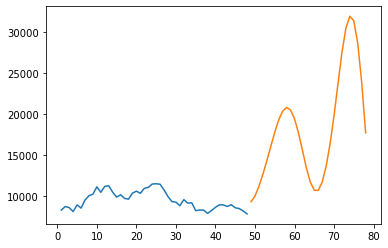

In [27]:
plt.plot(new_day,scaler.inverse_transform(df1[404:]))
plt.plot(pred_day,scaler.inverse_transform(lst_output))

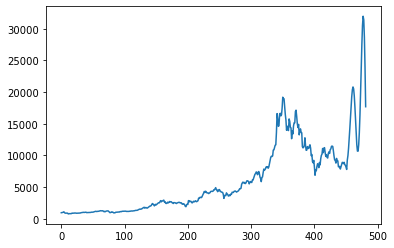

In [28]:
df2 = df1.tolist()
df2.extend(lst_output)
df2 = scaler.inverse_transform(df2).tolist()
plt.plot(df2)